In [ ]:
!unzip /content/sign_mnist_train.csv.zip
!unzip /content/sign_mnist_test.csv.zip

Archive:  /content/sign_mnist_train.csv.zip
  inflating: sign_mnist_train.csv    
Archive:  /content/sign_mnist_test.csv.zip
  inflating: sign_mnist_test.csv     


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.measure
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from skimage.feature import hog

In [ ]:
def ploting(x):
  f, ax = plt.subplots(2,5)
  f.set_size_inches(15, 15)
  k = 0
  for i in range(2):
    for j in range(5):
      ax[i,j].imshow(x[k], cmap = "gray")
      k += 1
    plt.tight_layout()

In [ ]:
train_data=pd.read_csv("/content/sign_mnist_train.csv")
test_data=pd.read_csv("/content/sign_mnist_test.csv")

In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
#We perform a grayscale normalization to reduce the effect of illumination's differences
x_train=np.array(train_data.iloc[:,1:])
x_train=np.float32(x_train.reshape(x_train.shape[0],28,28))
y_train=np.array(train_data.iloc[:,0])
x_test=np.array(test_data.iloc[:,1:])
x_test=np.float32(x_test.reshape(x_test.shape[0],28,28))
y_test=np.array(test_data.iloc[:,0])

In [ ]:
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(27455, 28, 28)
(27455, 24)


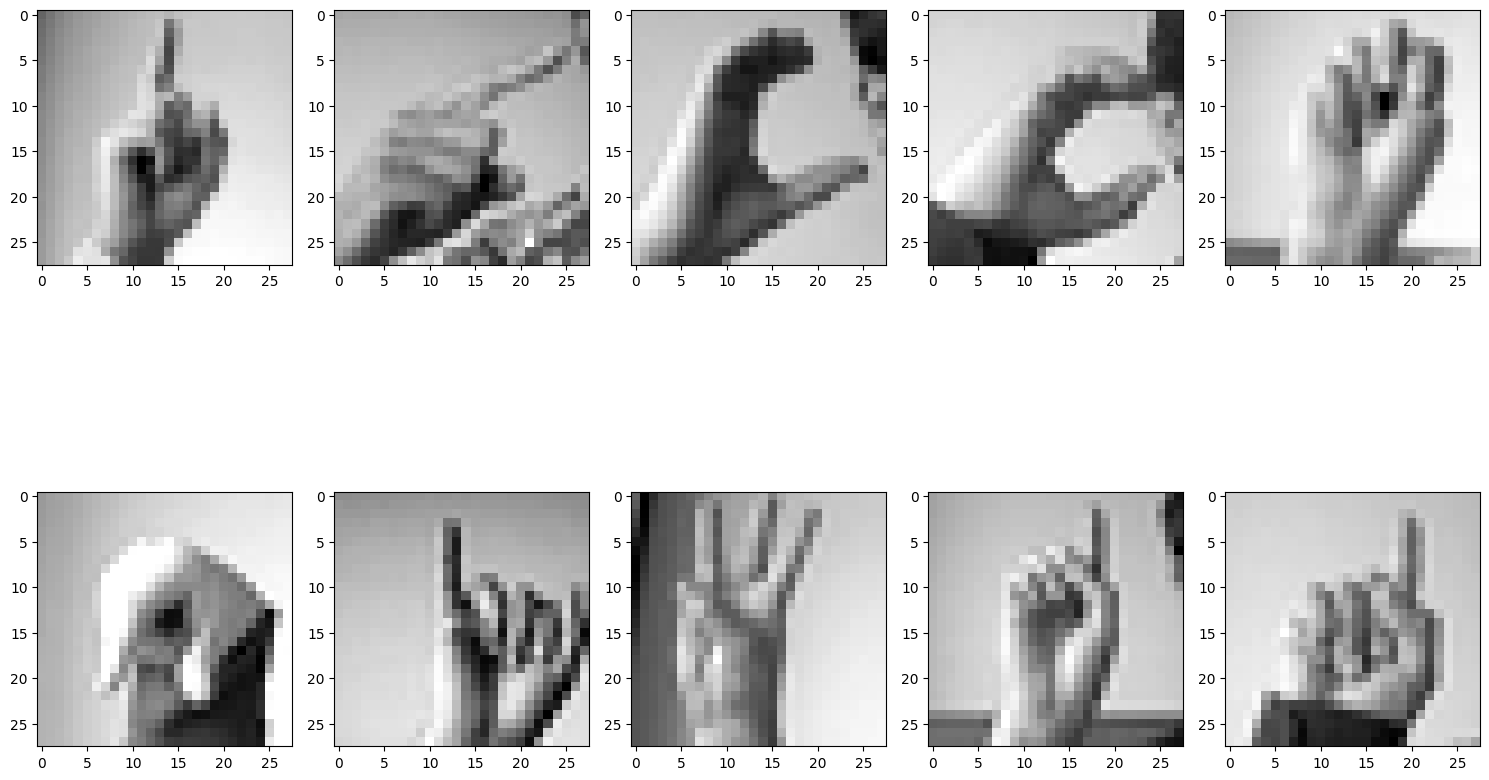

In [ ]:
ploting(x_train)

In [ ]:
def preprocessing(Images,plot=False):
  images=[]
  fds=[]
  for i in Images:
    _, thresh4 = cv2.threshold(i, 120,255, cv2.THRESH_TOZERO)
    #creating hog features
    fd, hog_image = hog(thresh4, orientations=9, pixels_per_cell=(2, 2),
                	cells_per_block=(1, 1), visualize=True, multichannel=False)
    images.append(hog_image)
    fds.append(fd)
  images=np.array(images)
  fds=np.array(fds)
  if(plot):
    ploting(images)
  return fds,images


<ipython-input-13-c7796ec6a7ea>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(thresh4, orientations=9, pixels_per_cell=(2, 2),


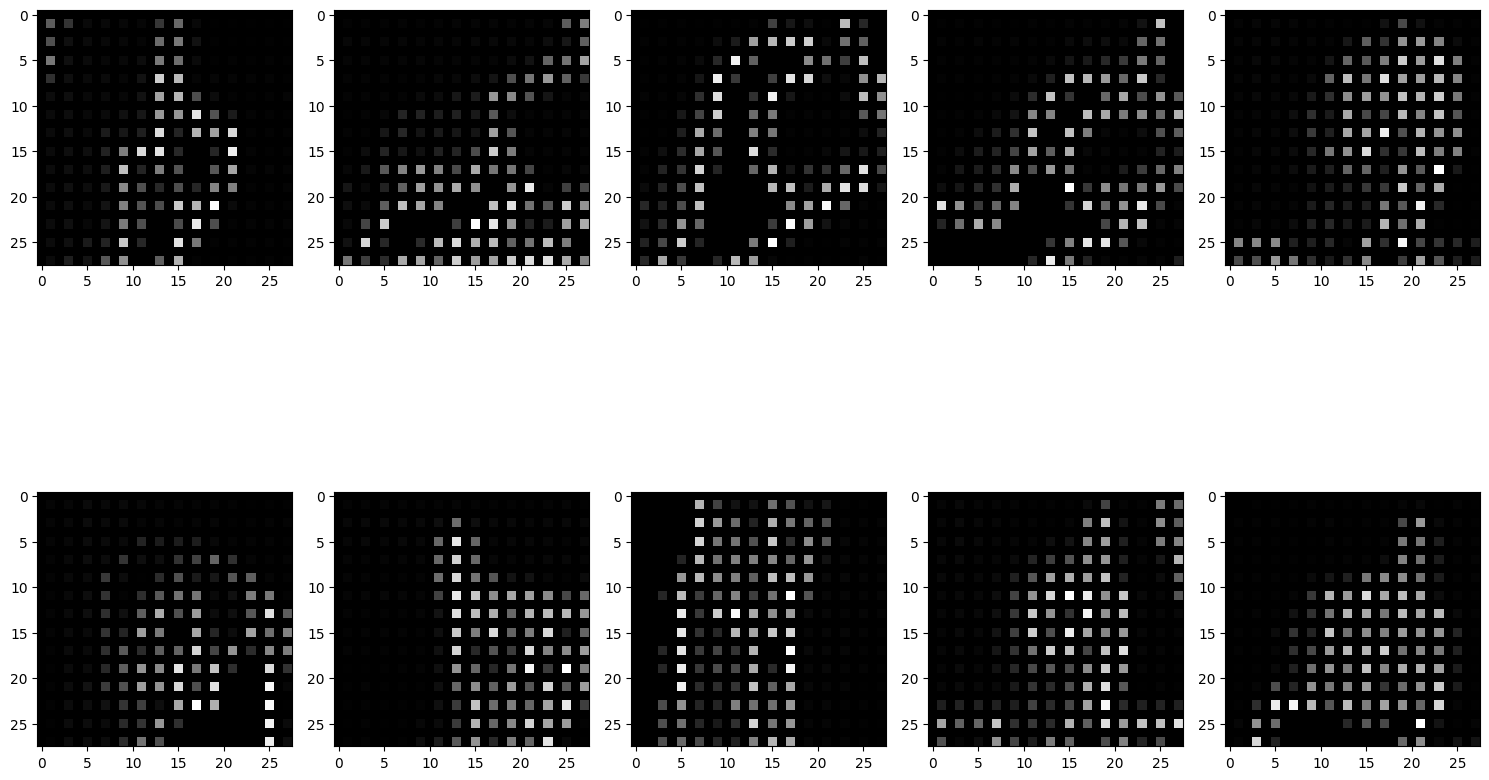

In [ ]:
x_train_fd,x_train_prep=preprocessing(x_train,plot=True)
x_test_fd,x_test_prep=preprocessing(x_test)

In [ ]:
scaler = StandardScaler()
x_train_fd = scaler.fit_transform(x_train_fd)
x_test_fd = scaler.fit_transform(x_test_fd)

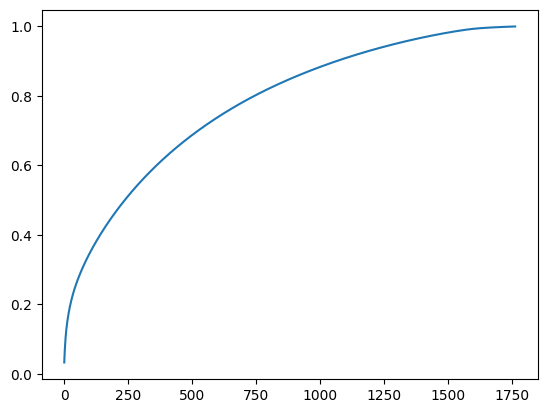

In [ ]:
# Import our plotting module, and PCA class
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(x_train_fd)
exp_variance = pca.explained_variance_ratio_
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance
fig, ax = plt.subplots()
ax.plot(range(pca.n_components_), cum_exp_variance)

In [ ]:
# Perform PCA with the chosen number of components and project data onto components
#after many tries found best number of dimentions=40
pca = PCA(40, random_state=10)
pca.fit(x_train_fd)

PCA(n_components=40, random_state=10)

In [ ]:
pca_projection = pca.transform(x_train_fd)

In [ ]:
svm_clf = SVC(C=5)
svm_clf.fit(pca_projection, y_train)

SVC(C=5)

In [ ]:
y_predict=svm_clf.predict(pca.transform(x_test_fd))
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.93      0.96       432
           2       0.97      0.93      0.95       310
           3       0.96      0.94      0.95       245
           4       0.94      0.99      0.97       498
           5       0.96      0.96      0.96       247
           6       0.90      0.87      0.89       348
           7       0.94      0.94      0.94       436
           8       0.89      1.00      0.94       288
          10       0.92      0.83      0.87       331
          11       0.98      1.00      0.99       209
          12       0.79      0.91      0.84       394
          13       0.89      0.76      0.82       291
          14       0.91      0.86      0.89       246
          15       1.00      1.00      1.00       347
          16       0.90      1.00      0.95       164
          17       0.49      0.88      0.63       144
          18       0.86    